c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\bakht\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning:

Setti

  Technology  Capital Cost [M€]  Operating Cost [M€]  Energy Supplied [GWh]  \
0      solar             894.82               135.88               13575.55   
1     onwind            2260.62               490.59               32684.45   
2        ror              35.35                 0.00                 495.61   
3       coal            8305.57              1019.00               36125.44   
4       CCGT             575.73               291.44                7231.14   
5       OCGT             127.28                 3.72                  67.94   

   LCOE [EUR/MWh]  
0           75.92  
1           84.17  
2           71.34  
3          258.12  
4          119.92  
5         1928.25  


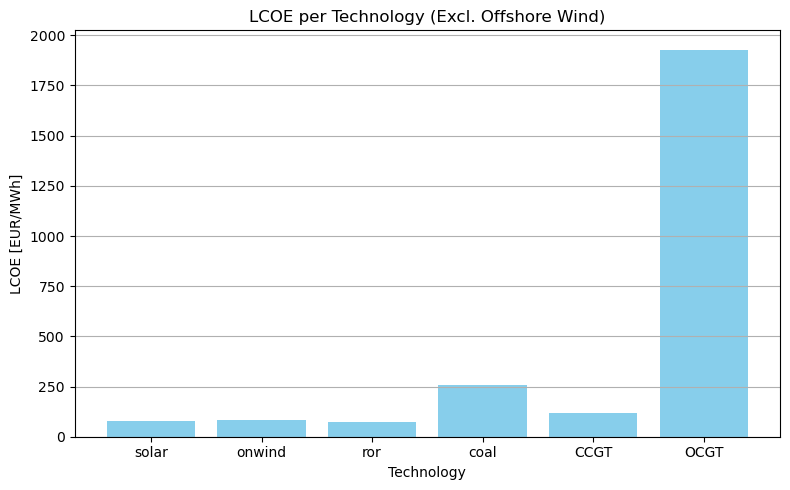

In [6]:
import pypsa
import pandas as pd
import os
import matplotlib.pyplot as plt

# ----------------------------
# CONFIGURATION
# ----------------------------
file_path = "elec_s_14_ec_lv1.0_RES0.6-1H_dle.nc"

# List of carriers to include (excluding offshore wind)
included_carriers = ["solar", "onwind", "hydro", "ror", "coal", "CCGT", "OCGT"]

# ----------------------------
# LOAD AND ANALYZE
# ----------------------------
n = pypsa.Network(file_path)

lcoe_data = []

for tech in included_carriers:
    tech_gens = n.generators[n.generators.carrier == tech].index
    if tech_gens.empty:
        continue

    cap_cost = (n.generators.loc[tech_gens, "capital_cost"] *
                n.generators.loc[tech_gens, "p_nom_opt"]).sum()

    op_cost = (n.generators_t.p[tech_gens] *
               n.generators.loc[tech_gens, "marginal_cost"]).sum().sum()

    energy = n.generators_t.p[tech_gens].sum().sum()  # MWh/year directly

    if energy > 0:
        lcoe = (cap_cost + op_cost) / energy
    else:
        lcoe = float("nan")

    lcoe_data.append({
        "Technology": tech,
        "Capital Cost [M€]": cap_cost / 1e6,
        "Operating Cost [M€]": op_cost / 1e6,
        "Energy Supplied [GWh]": energy / 1e3,
        "LCOE [EUR/MWh]": lcoe
    })

# ----------------------------
# RESULTS
# ----------------------------
df = pd.DataFrame(lcoe_data)
print(df.round(2))

# Plot LCOE comparison
plt.figure(figsize=(8, 5))
plt.bar(df["Technology"], df["LCOE [EUR/MWh]"], color="skyblue")
plt.title("LCOE per Technology (Excl. Offshore Wind)")
plt.ylabel("LCOE [EUR/MWh]")
plt.xlabel("Technology")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("lcoe_per_technology_filtered.png", dpi=300)
plt.show()

# Optional: export
df.to_csv("lcoe_filtered.csv", index=False)
